# Ex02 - Resolução espacial e resolução radiométrica


1. **Entendendo a resolução espacial:** Reproduza as figuras dos slides 21 e 22 (Aula2.pdf). Use, no lugar da imagem da rosa, a imagem do cameraman.
2. **Entendendo a resolução radiométrica:** Visualize a imagem do cameraman em níveis de cinza e altere progressivamente a quantização (slide 30).
3. **Explorando diferentes espaços de cores:** Abra uma imagem colorida (use as imagens existentes no diretório *data*) e visualize as 3 bandas RGB. Converta para uma imagem em níveis de cinza usando vários métodos e encontre uma forma (quantitativa) de comparar as diversas imagens em níveis de cinza obtidas:
    - convert(L) do PIL;
    - médias das bandas R, G, B;
    - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
4. **Retomando a geração de imagens sintéticas:** Faça um programa qualquer de geração de imagem a partir de uma equação. Utilize a função *indices* do Numpy

# Resolução 

## Exercício 1

### Importação das bibliotecas e verificação das informações da figura.

In [41]:
%matplotlib inline 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('data/cameraman.tif')
img.size, img.format, img.mode

((256, 256), 'TIFF', 'L')

### Usando o matplotlib para alterar a resolução espacial da imagem. Os parâmetros foram passados em polegadas.

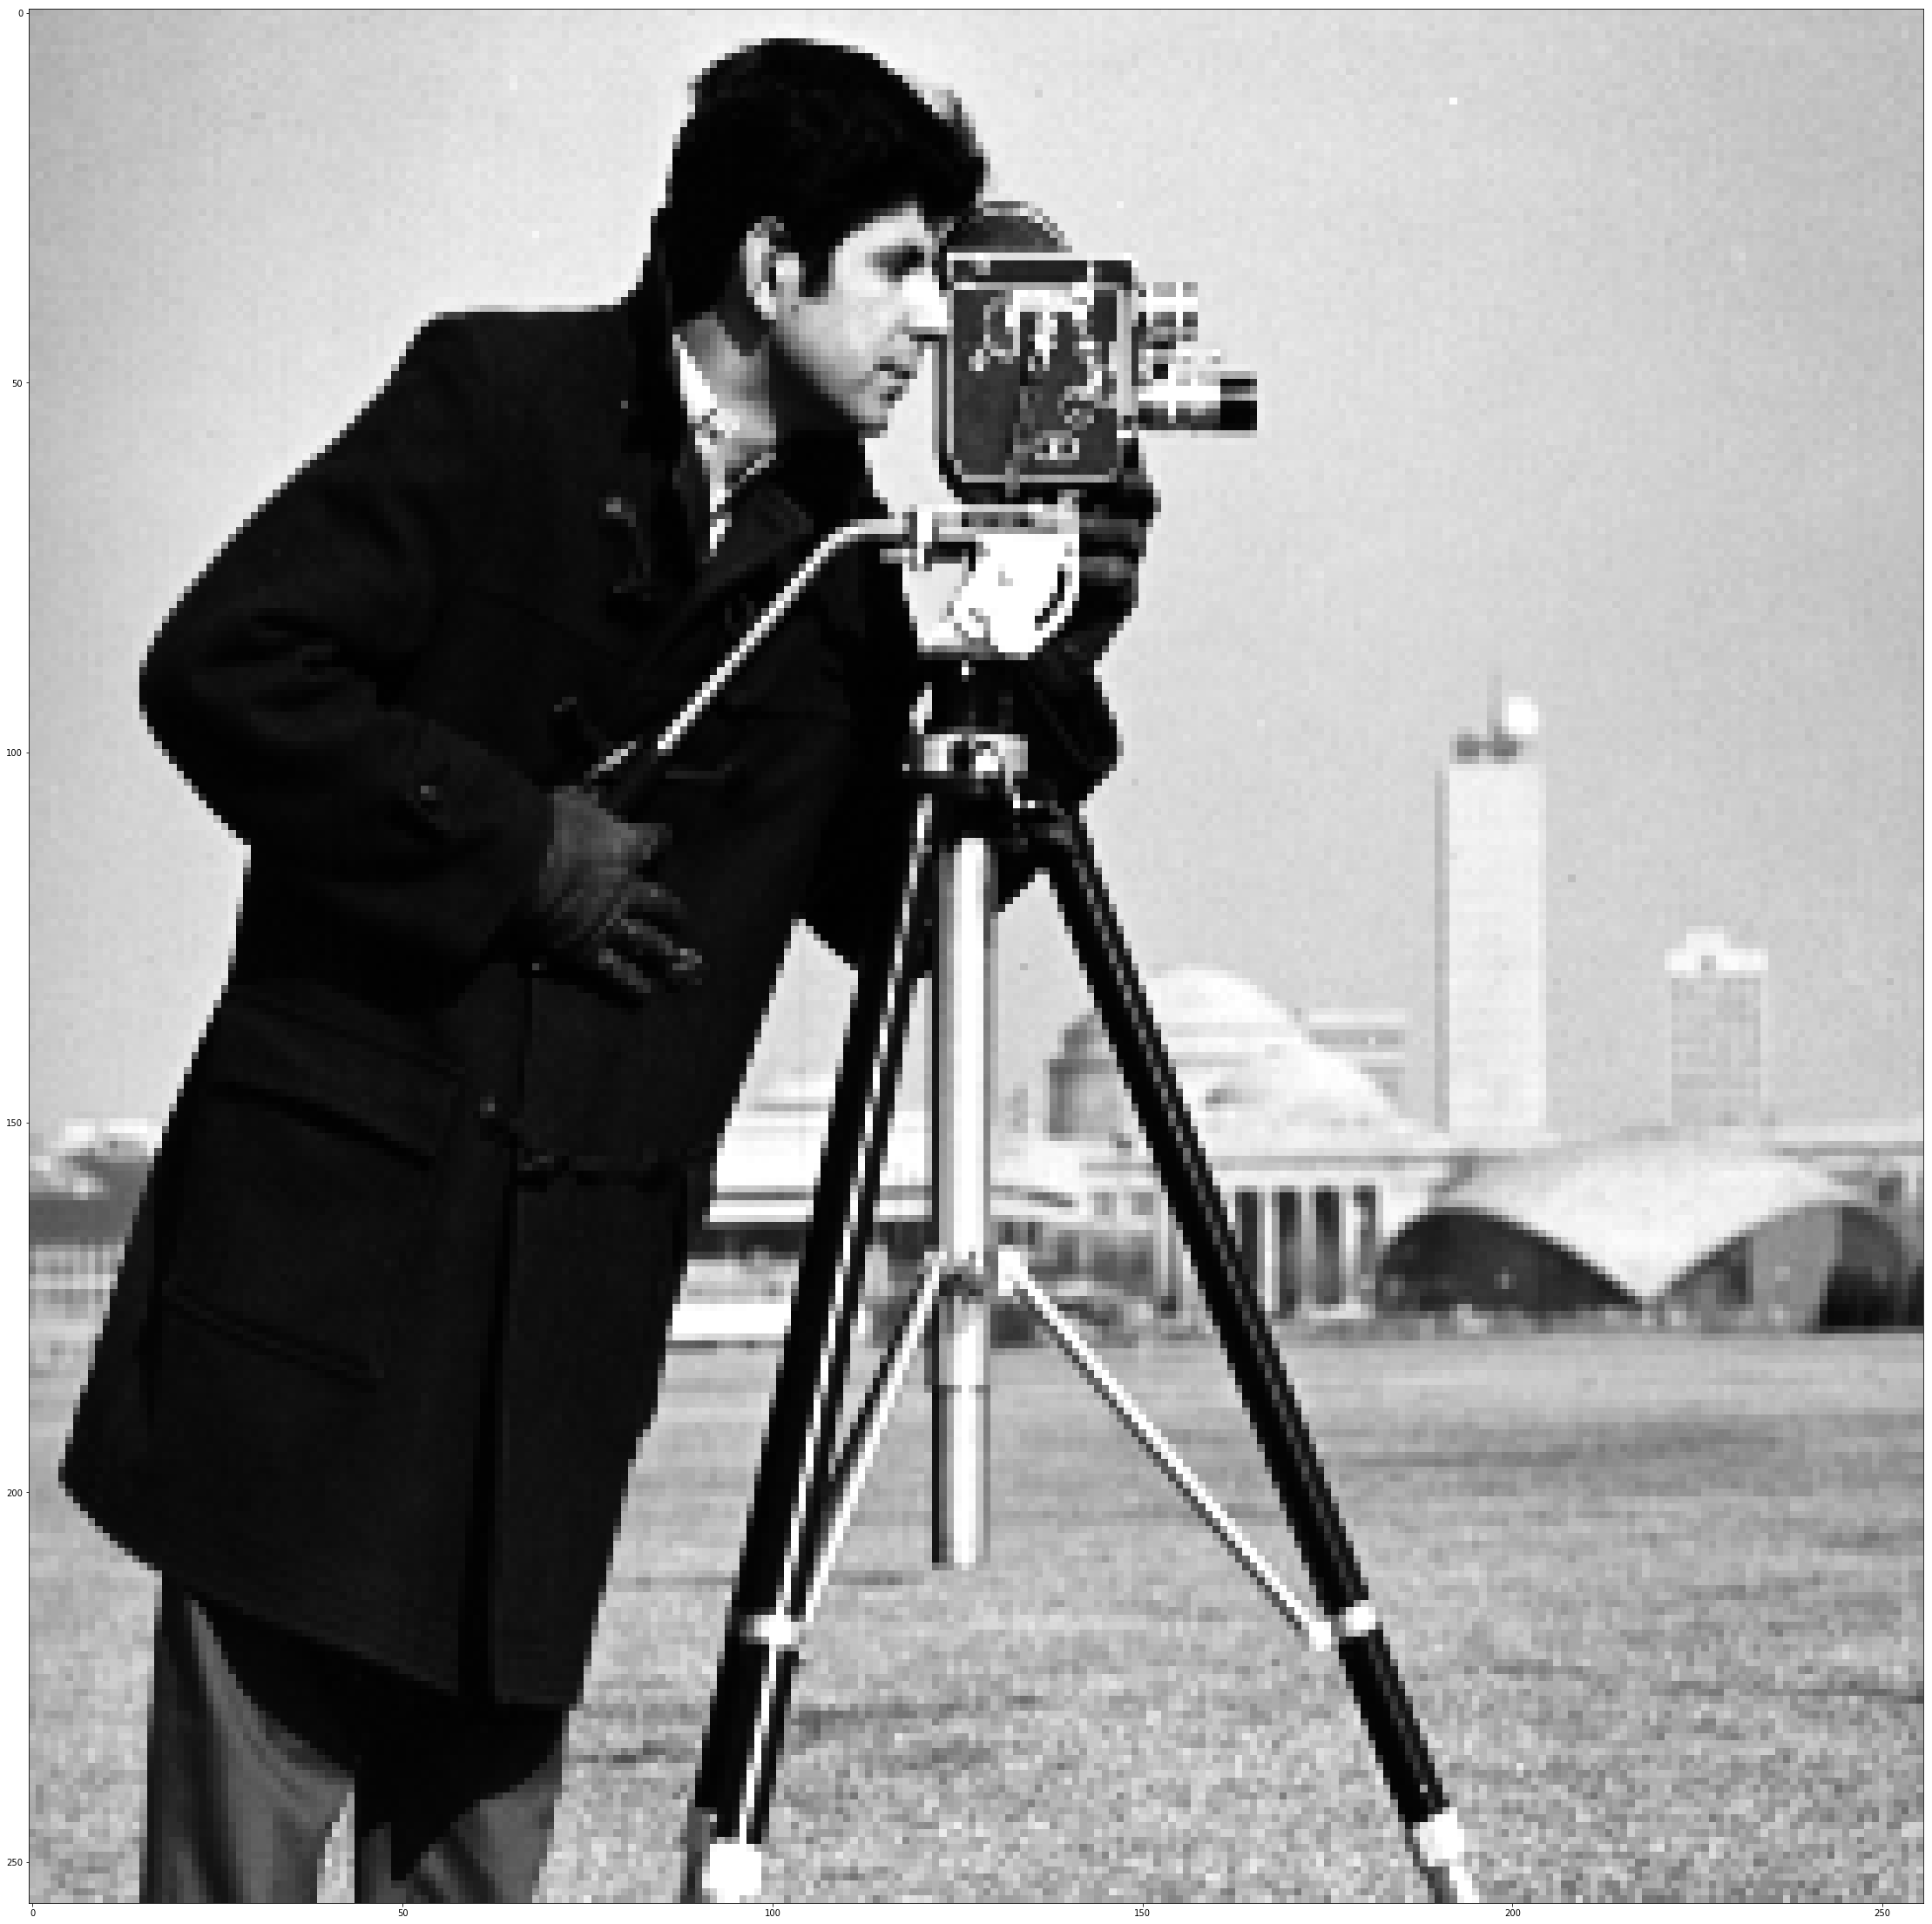

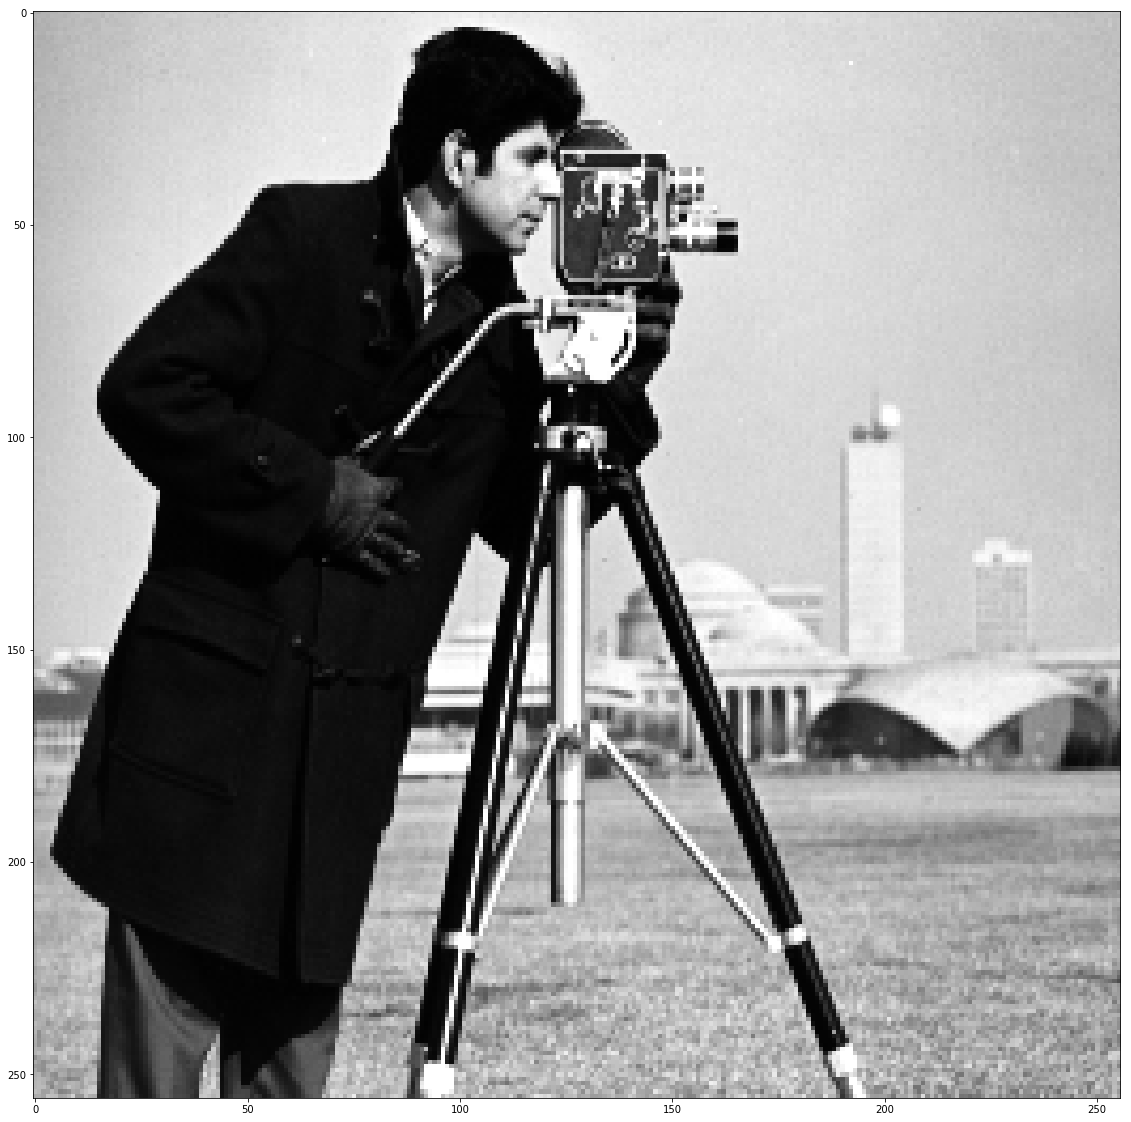

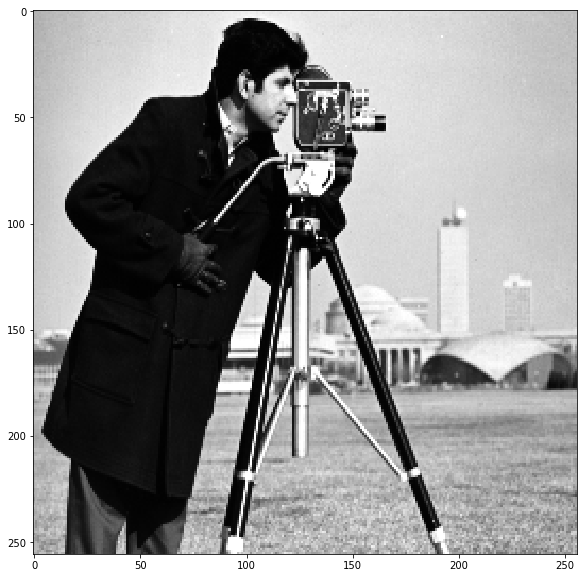

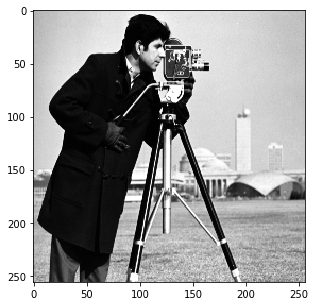

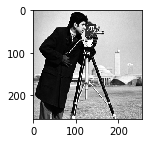

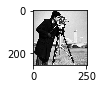

In [37]:
img = np.array(img)
fs = [40, 20, 10, 5, 2, 1]

for i in fs:
    plt.figure(figsize=(i, i))
    #plt.title("Cameraman - fs=","%di",  fontsize=18)
    plt.imshow(img, cmap='gray')
    #plt.axis('off')
    plt.show()
    
    

Dessa Maneira, podemos observar que alteramos o tamanho da imagem na visualização e não na matriz. Ou seja, se visualizarmos a matriz inicial será observado que não houve mudança.

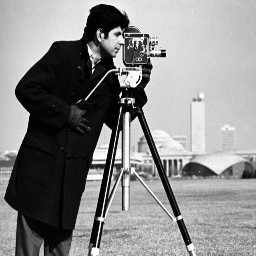

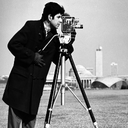

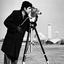

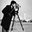

In [45]:
#Diminuir a resolução de acordo com os tamanhos sugeridos:
basewidth1 = 128
basewidth2 = 64
basewidth3 = 32
basewidth4 = 16
basewidth5 = 8

#para manter a proporção da largura e altura da imagem original
percent = (float(img.size[0])/float(img.size[1]))

#calcula a altura proporcional da nova imagem.
hsize1 = int(float(basewidth1) * float(percent))
hsize2 = int(float(basewidth2) * float(percent))
hsize3 = int(float(basewidth3) * float(percent))
hsize4 = int(float(basewidth4) * float(percent))
hsize5 = int(float(basewidth5) * float(percent))


img1 = img.resize((basewidth1, hsize1), Image.ANTIALIAS)
img2 = img.resize((basewidth2, hsize2), Image.ANTIALIAS)
img3 = img.resize((basewidth3, hsize3), Image.ANTIALIAS)
img4 = img.resize((basewidth4, hsize4), Image.ANTIALIAS)
img5 = img.resize((basewidth5, hsize5), Image.ANTIALIAS)

display(img, img1, img2, img3, img4, img5)

Podemos observar que a biblioteca PIL imprime as imagens com os seus tamanhos originais. Vamos agora imṕrimir as imagens utilizando o matplotlib.

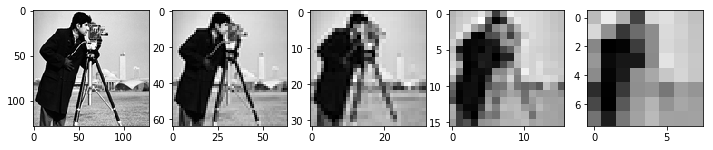

In [46]:
fig, ax = plt.subplots(1, 5, figsize=(12,12))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
ax[2].imshow(img3, cmap='gray')
ax[3].imshow(img4, cmap='gray')
ax[4].imshow(img5, cmap='gray')

Podemos notar a alteração na resolução das imagens dessa maneira, ou seja, a última imagem está "pixada".

Agora, utilizaremos o Thumbnail da biblioteca PIL, o qual irá mudar a resolução espacial da imagem, porém presevará os aspectos originais. 

    Obs.: o thumbnail não permite causar o efeito para imagens maiores do que a original.

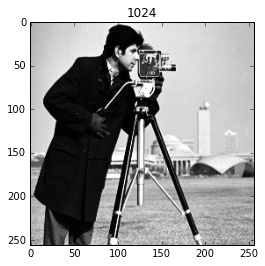

In [5]:
img.thumbnail((1024, 1024), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("1024")
plt.show()


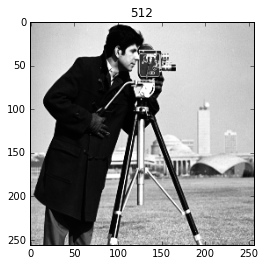

In [6]:
img.thumbnail((512, 512), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("512")
plt.show()

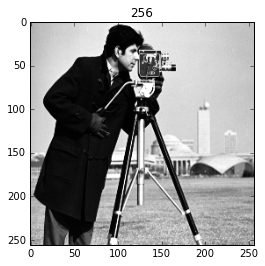

In [7]:
img.thumbnail((256, 256), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("256")
plt.show()

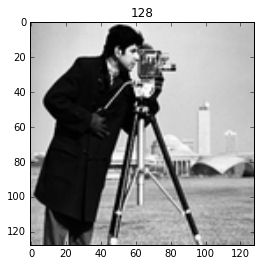

In [8]:
img.thumbnail((128, 128), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("128")
plt.show()

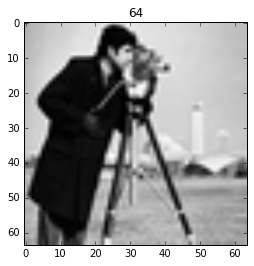

In [9]:
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("64")
plt.show()

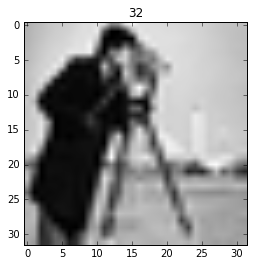

In [10]:
img.thumbnail((32, 32), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("32")
plt.show()

## Exercício 2

#### Imagem original 8bits

(256, 256) TIFF L <class 'PIL.TiffImagePlugin.TiffImageFile'>


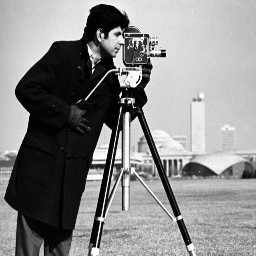

In [11]:
img = Image.open('../data/cameraman.tif')

print img.size, img.format, img.mode, type(img)
img

#### Imagem com profundidade de 4 bits

(256, 256) None P <class 'PIL.Image.Image'>


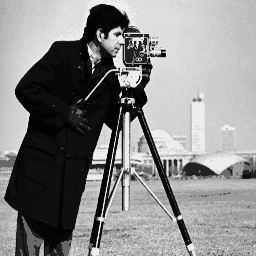

In [12]:
f4 = img.quantize(colors=16)
print f4.size, f4.format, f4.mode, type(f4)
f4

#### Imagem com profundidade  de 2 bits

(256, 256) None P <class 'PIL.Image.Image'>


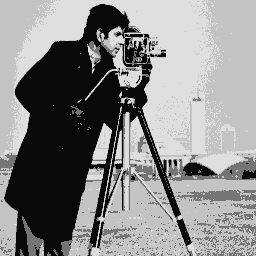

In [13]:
f2 = img.quantize(colors=4)
print f2.size, f2.format, f2.mode, type(f2)
f2

Podemos observar que a resolução radiométrica são alterações na quantização das imagens.

## Exercício 3

(256, 257) TIFF RGB


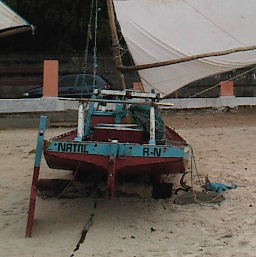

In [50]:
img = Image.open('data/boat.tif')

print (img.size, img.format, img.mode)
img

In [52]:
r,g,b = img.split()

L None (256, 257)


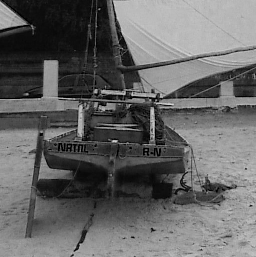

In [54]:
print (r.mode, r.format, r.size)
r

L None (256, 257)


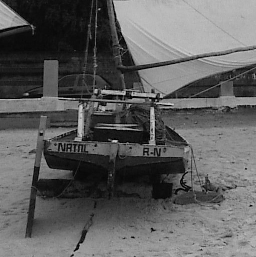

In [55]:
print (g.mode, g.format, g.size)
g


L None (256, 257)


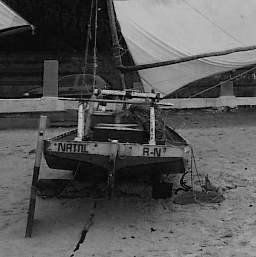

In [56]:
print (b.mode, b.format, b.size)
b

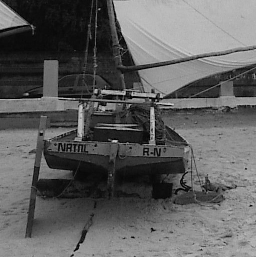

In [58]:
imgGray = Image.open('data/boat.tif').convert('L')
imgGray

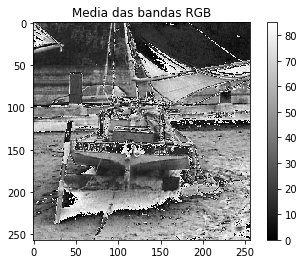

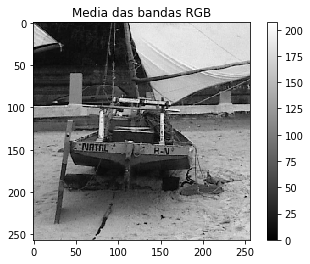

In [60]:
rnp = np.array(r)
bnp = np.array(b)
gnp = np.array(g)

I = (rnp + bnp + gnp)/3

plt.imshow(I,cmap='gray')
plt.title('Media das bandas RGB')
plt.colorbar()
plt.show()

I2 = (rnp/3) + (bnp/3) + (gnp/3)

plt.imshow(I2,cmap='gray')
plt.title('Media das bandas RGB')
plt.colorbar()
plt.show()

Podemos observar que a primeira imagem ocorre o 'overflow', ou seja, os valores ultrapassam os 255 tons de cinza.

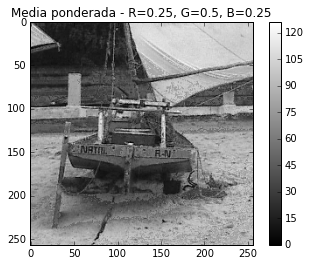

In [23]:
Ip = (2.5*rnp + 2.5*bnp + 5*gnp)/10
plt.imshow(Ip,cmap='gray')
plt.title('Media ponderada - R=0.25, G=0.5, B=0.25')
plt.colorbar()

O grau de luminosidade de uma cor significa quanto o olho humano pode perceber desta cor.  Pode ser calculado por:

                                Luminosidade = R*0.3 + G*0.59 + B *0.11

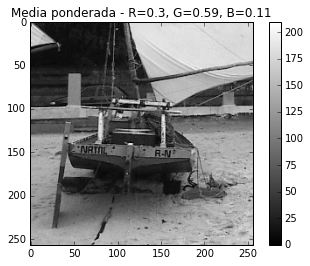

In [24]:
Ip2 = (0.3*rnp + 0.59*gnp + 0.11*bnp)
plt.imshow(Ip2,cmap='gray')
plt.title('Media ponderada - R=0.3, G=0.59, B=0.11')
plt.colorbar()

Como podemos observar, as imagens geradas apresentaram diferentes níveis de cinzas (com excessão da média das bandas RGB que obteve uma imagem distorcida), as quais não podemos afirmar que são melhores ou piores. Entretando, podemos dizer que algumas são mais perceptíveis em relação a diferenciar determinadas cores. A imagem gerada através da luminosidade (R=0.3, G=0.59, B=0.11) apresentou uma maior percepção das cores em relação as anteriores.


## Exercício 4

A imagem gerada a seguir, partiu da equação sinc, a qual é muito utilizada em filtros na area de processamento de sinais.

In [25]:
e = np.spacing(1) #valor pequeno para evitar a divisão por zeros
rows = np.linspace(-10.0, 10.0, 150) # coordenadas das linhas
cols = np.linspace(-12.0, 12.0, 180)
r, c = np.meshgrid(rows, cols, indexing='ij') #grid de coordenadas estilo numpy
z =  np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e)

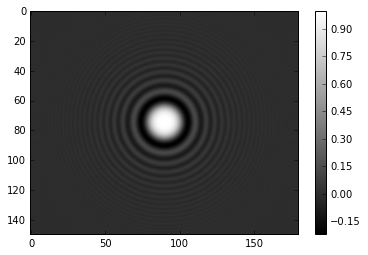

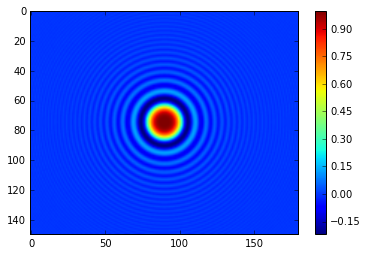

In [26]:
plt.imshow(z, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(z)
plt.colorbar()
plt.show()